# Gaußsche Fehlerfunktion

Als Fehlerfunktion oder [gaußsche Fehlerfunktion](http://de.wikipedia.org/wiki/Fehlerfunktion) bezeichnet man in der Theorie der Speziellen Funktionen das Integral

$$\operatorname{erf}(x) = \frac 2{\sqrt\pi} \int_0^x e^{-\tau^2}\,\mathrm d\tau$$




Populating the interactive namespace from numpy and matplotlib
Auswertung numerisches Experiment (Zufallsgenerator ) N= 10000000
--------------------------------------------------------------------------------------------------
sigma= 1 ,  theoretische Anzahl Werte innerhalb +-sigma:  68.2689492137 %
sigma= 1 ,  experimentelle Anzahl Werte innerhalb +-sigma:  68.28721 %
--------------------------------------------------------------------------------------------------


`%matplotlib` prevents importing * from pylab and numpy


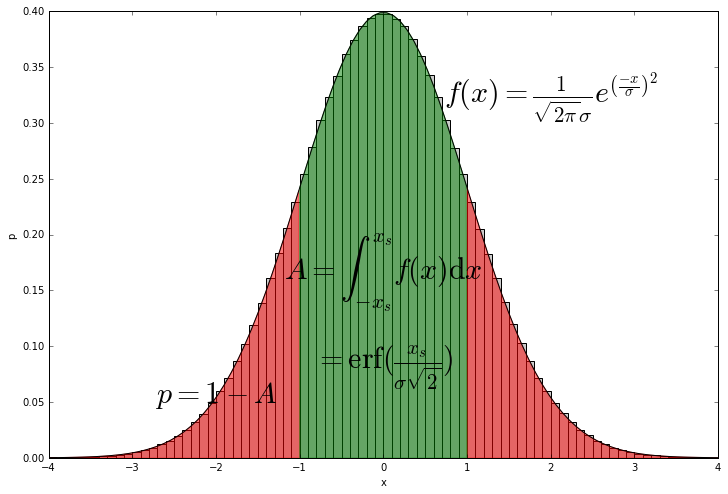

In [16]:
%pylab inline

from scipy.special import erf # Gaußsche Fehlerfunktion (Integralfunktion)

def gaussian(x,sigma):
    return 1.0/(sqrt(2*pi)*sigma)*exp(-(x/sigma)**2/2)


N=10000000

rd=randn(N)
sig=rd.std()
    
bi=int(5*log(N))
rrange=4

fig=figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)

n, bins, patches = hist(rd, bins=bi, range=[-rrange,rrange], normed=True, histtype='bar',color='0.8', edgecolor='k')

xg=linspace(-rrange,rrange,100)

G=gaussian(xg,sig)
plot(xg,G,'k',linewidth=1)

S=1

# make the shaded region
a=-rrange
b=-S
ix = arange(a, b, 0.01)
iy = gaussian(ix,sig)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='r', edgecolor='r',alpha=0.5)
ax.add_patch(poly)
text(-2, 0.05,
     r"$p=1-A$", horizontalalignment='center',
     fontsize=30)
a=S
b=rrange
ix = arange(a, b, 0.01)
iy = gaussian(ix,sig)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]

poly = Polygon(verts, facecolor='r', edgecolor='r',alpha=0.5)
ax.add_patch(poly)


a=-S
b=S
ix = arange(a, b, 0.01)
iy = gaussian(ix,sig)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='g', edgecolor='g',alpha=0.5)
ax.add_patch(poly)
rmax=G.max()
text(0.5 * (a + b), 0.4*rmax,
     r"$A=\int_{-x_s}^{x_s} f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=30)

text(0.5 * (a + b), 0.2*rmax,
     r"$=\mathrm{erf}(\frac{x_s}{\sigma \sqrt{2}})$", horizontalalignment='center',
     fontsize=30)


text(2.0,0.8*rmax,
     r"$f(x)=\frac{1}{\sqrt{2\pi}\sigma} e^{ ( \frac{-x}{\sigma} )^2 }$", horizontalalignment='center',
     fontsize=30)

xlabel('x')
ylabel('p')

print('Auswertung numerisches Experiment (Zufallsgenerator ) N=',N)
print("--------------------------------------------------------------------------------------------------")

s=1
print("sigma=",s,",  theoretische Anzahl Werte innerhalb +-sigma: ",erf(s/sqrt(2))*100, "%")
print("sigma=",s,",  experimentelle Anzahl Werte innerhalb +-sigma: ", 100-float(sum(rd>s)+sum(rd<-s))/N*100, "%")
print("--------------------------------------------------------------------------------------------------")
savefig('Normalverteilung.png',dpi=75)